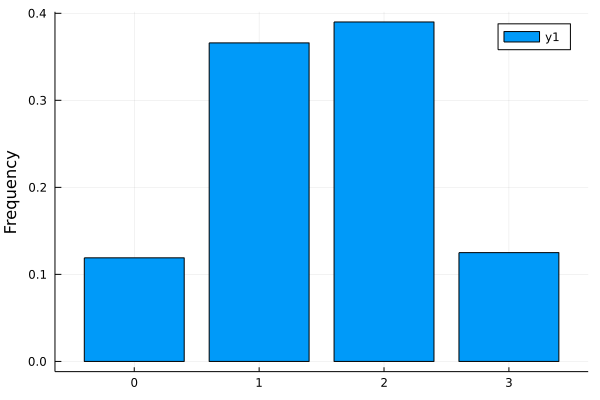

In [1]:
using Gen
include("auxilery.jl")
@gen function model()
    a=@trace(bernoulli(0.5),:a)
    b=@trace(bernoulli(0.5),:b)
    c=@trace(bernoulli(0.5),:c)
    d=a+b+c
end
simulate(model,())
ys=[model() for _ in 1:1000]
viz(ys)

In [8]:
function importence_resamplin_inference(model, var,value, amount_of_computation)
    
    # Create a choice map that maps model addresses (:y, i)
    # to observed values ys[i]. We leave :slope and :intercept
    # unconstrained, because we want them to be inferred.
    observations = Gen.choicemap()
    observations[var] = value
           
    
    # Call importance_resampling to obtain a likely trace consistent
    # with our observations.
    (trace, _) = Gen.importance_resampling(model, (), observations, amount_of_computation);
    return trace
end;

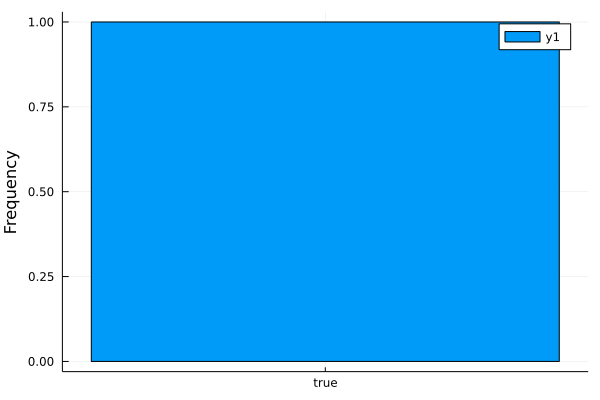

In [10]:
@gen function model2()
    a=@trace(bernoulli(0.5),:a)
    b=@trace(bernoulli(0.5),:b)
    c=@trace(bernoulli(0.5),:c)
    if a+b+c == 3
        @trace(bernoulli(0.9999),:"d==3")
    else
        @trace(bernoulli(0.00001),:"d==3")
    end
end
ys=[]
for _ in 1:1000
    trace = importence_resamplin_inference(model2, "d==3",true, 100)
    push!(ys,trace[:a])
end
viz(ys)

Gen.DynamicDSLChoiceMap(Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}(:a => Gen.ChoiceOrCallRecord{Bool}(true, -0.6931471805599453, NaN, true), :b => Gen.ChoiceOrCallRecord{Bool}(false, -0.6931471805599453, NaN, true), "d>=2" => Gen.ChoiceOrCallRecord{Bool}(true, -0.0010005003335835344, NaN, true), :c => Gen.ChoiceOrCallRecord{Bool}(true, -0.6931471805599453, NaN, true)), Dict{Any, Trie{Any, Gen.ChoiceOrCallRecord}}()))


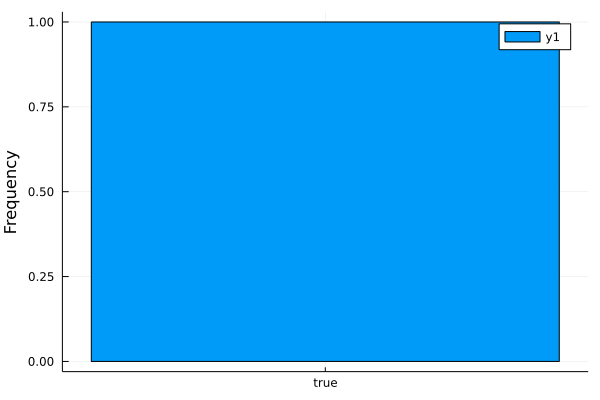

In [12]:
@gen function model2()
    a=@trace(bernoulli(0.5),:a)
    b=@trace(bernoulli(0.5),:b)
    c=@trace(bernoulli(0.5),:c)
    if a+b+c >= 2
        @trace(bernoulli(0.999),:"d>=2")
    else
        @trace(bernoulli(0.001),:"d>=2")
    end
end
ys=[]
for _ in 1:100
    trace = do_inference(model2, "d>=2",true, 100)
    push!(ys,trace[:a])
end
viz(ys)

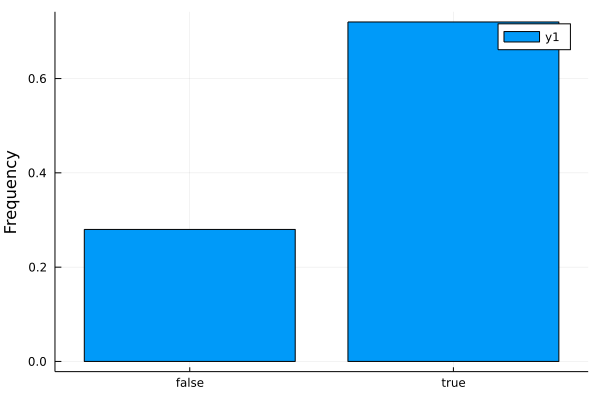

In [5]:
@gen function takeSample()
    a = @trace(bernoulli(0.5),:a)
    b = @trace(bernoulli(0.5),:b)
    c = @trace(bernoulli(0.5),:c)
    d = a+b+c
    d >=2 ? a : takeSample()
end
ys = [takeSample() for _ in 1:100]
viz(ys)

In [6]:
@gen function enumerateInfer ()
    
end

LoadError: syntax: space before "(" not allowed in "enumerateInfer (" at In[6]:1